<a href="https://colab.research.google.com/github/ChiaraDeMartin95/ciao/blob/master/PionIDwithML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "PionID"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
#os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/gdrive')
path_to_dir='/content/gdrive/My\ Drive/FinalExamML/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/My\ Drive/FianlExamML

ls: cannot access '/content/gdrive/My Drive/FianlExamML': No such file or directory


In [ ]:
!pip install uproot 

     |████████████████████████████████| 122kB 2.9MB/s 
     |████████████████████████████████| 92kB 5.1MB/s 


In [ ]:
import uproot

In [ ]:
filePion=uproot.open("/content/gdrive/My Drive/AnalysisResultsPionsMC.root")
#filePion=uproot.open("/content/gdrive/My Drive/AnalysisResults2018f1_extra_Pions_5runs.root")

In [ ]:
!ls /content/gdrive/My\ Drive/Ana*

'/content/gdrive/My Drive/AnalysisResults2018f1_extra_Pions_5runs.root'
'/content/gdrive/My Drive/AnalysisResultsPionsData.root'
'/content/gdrive/My Drive/AnalysisResultsPionsMC.root'


In [ ]:
filePion.keys()

[b'MultSelection_MC;1', b'MyTaskPions;1']

In [ ]:
dirPion=filePion["MyTaskPions"]

In [ ]:
dirPion.keys()

[b'MyOutputContainer;1',
 b'fSignalTree;1',
 b'fBkgTree;1',
 b'MyOutputContainer3;1',
 b'MyOutputContainer4;1',
 b'Risoluzione;1']

In [ ]:
treePion=dirPion["fSignalTree"]

In [ ]:
treePion.keys()

[b'fTreeVariableNSigmaTOFPion',
 b'fTreeVariableNSigmaTOFProton',
 b'fTreeVariableNSigmaTOFKaon',
 b'fTreeVariableNSigmaTPCPion',
 b'fTreeVariableNSigmaTPCProton',
 b'fTreeVariableNSigmaTPCKaon',
 b'fTreeVariabledEdX',
 b'fTreeVariableTOFBeta',
 b'fTreeVariableTOFMass',
 b'fTreeVariablePtTrigger',
 b'fTreeVariablePtot',
 b'fTreeVariableChargeTrigger',
 b'fTreeVariableEtaTrigger',
 b'fTreeVariablePhiTrigger',
 b'fTreeVariableDCAz',
 b'fTreeVariableDCAxy',
 b'fTreeVariableisPrimaryTrigger',
 b'fTreeVariableMultiplicity',
 b'fTreeVariablePDGCodeTrigger']

In [ ]:
treePion['fTreeVariableChargeTrigger'].array()

array([ 1,  1,  1, ...,  1,  1, -1], dtype=int32)

In [ ]:
PandaPionDF=treePion.pandas.df(["fTreeVariablePDGCodeTrigger", "fTreeVariableNSigmaTOF*", "fTreeVariableNSigmaTPC*", "fTreeVariabledEdX", "fTreeVariableTOFBeta", "fTreeVariablePtTrigger", "fTreeVariablePtot"])
PandaPionDFTry1=treePion.pandas.df(["fTreeVariablePDGCodeTrigger", "fTreeVariableNSigmaTOF*", "fTreeVariableNSigmaTPC*", "fTreeVariabledEdX", "fTreeVariableTOFBeta", "fTreeVariablePtTrigger", "fTreeVariablePtot"])

In [ ]:
PandaPionDFTry1

,fTreeVariablePDGCodeTrigger,fTreeVariableNSigmaTOFPion,fTreeVariableNSigmaTOFProton,fTreeVariableNSigmaTOFKaon,fTreeVariableNSigmaTPCPion,fTreeVariableNSigmaTPCProton,fTreeVariableNSigmaTPCKaon,fTreeVariabledEdX,fTreeVariableTOFBeta,fTreeVariablePtTrigger,fTreeVariablePtot
entry,,,,,,,,,,,
0,211,-2.230226,-35.320332,-25.963812,-0.127966,-9.431816,-3.828087,52.43750,0.994264,0.649327,0.670385
1,2212,10.081083,0.804991,7.599912,-2.008423,0.096354,0.284303,47.50000,0.924140,2.227615,2.447410
2,211,-0.553305,-27.344255,-33.411983,0.689799,-11.394800,-7.378132,47.75000,0.942234,0.379171,0.388629
3,211,-999.000000,-999.000000,-999.000000,-0.032429,-12.332022,-8.524711,51.34375,-999.000000,0.369425,0.367349
4,-211,-999.000000,-999.000000,-999.000000,-0.359210,-9.399902,-4.866641,45.81250,-999.000000,0.446053,0.562155
...,...,...,...,...,...,...,...,...,...,...,...
29881,211,-999.000000,-999.000000,-999.000000,0.184357,-1.257316,1.580425,53.65625,-999.000000,1.026745,1.465556
29882,-211,-999.000000,-999.000000,-999.000000,1.364241,-11.928434,-8.041983,47.78125,-999.000000,0.261129,0.351443
29883,211,-999.000000,-999.000000,-999.000000,0.234863,-11.159876,-6.697582,52.50000,-999.000000,0.329840,0.446656


In [ ]:
VarNames=["fTreeVariablePDGCodeTrigger", "fTreeVariableNSigmaTOFPion","fTreeVariableNSigmaTOFProton","fTreeVariableNSigmaTOFKaon", "fTreeVariableNSigmaTPCPion","fTreeVariableNSigmaTPCProton", "fTreeVariableNSigmaTPCKaon", "fTreeVariabledEdX", "fTreeVariableTOFBeta", "fTreeVariablePtTrigger", "fTreeVariablePtot"]

In [ ]:
PandaPionDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29886 entries, 0 to 29885
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fTreeVariablePDGCodeTrigger   29886 non-null  int32  
 1   fTreeVariableNSigmaTOFPion    29886 non-null  float64
 2   fTreeVariableNSigmaTOFProton  29886 non-null  float64
 3   fTreeVariableNSigmaTOFKaon    29886 non-null  float64
 4   fTreeVariableNSigmaTPCPion    29886 non-null  float64
 5   fTreeVariableNSigmaTPCProton  29886 non-null  float64
 6   fTreeVariableNSigmaTPCKaon    29886 non-null  float64
 7   fTreeVariabledEdX             29886 non-null  float64
 8   fTreeVariableTOFBeta          29886 non-null  float64
 9   fTreeVariablePtTrigger        29886 non-null  float64
 10  fTreeVariablePtot             29886 non-null  float64
dtypes: float64(10), int32(1)
memory usage: 2.4 MB


In [ ]:
PandaPionDF.describe()

,fTreeVariablePDGCodeTrigger,fTreeVariableNSigmaTOFPion,fTreeVariableNSigmaTOFProton,fTreeVariableNSigmaTOFKaon,fTreeVariableNSigmaTPCPion,fTreeVariableNSigmaTPCProton,fTreeVariableNSigmaTPCKaon,fTreeVariabledEdX,fTreeVariableTOFBeta,fTreeVariablePtTrigger,fTreeVariablePtot
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.000000,29886.000000,29886.000000,29886.000000,29886.000000,29886.000000,29886.000000
mean,4.898347,-691.978429,-702.733083,-699.022504,0.962169,-8.064070,-4.049363,55.557713,-694.454808,0.689646,0.798664
std,496.392148,468.556713,448.616604,456.007426,12.408893,10.953616,11.248198,25.783751,460.209062,0.612956,0.739125
min,-2212.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,0.134207,0.118804
25%,-211.000000,-999.000000,-999.000000,-999.000000,-0.689037,-11.808264,-8.294208,48.187500,-999.000000,0.324390,0.363637
50%,11.000000,-999.000000,-999.000000,-999.000000,0.058235,-9.476601,-4.296030,51.062500,-999.000000,0.511089,0.583915
75%,211.000000,-0.841192,-36.153902,-33.377750,0.857522,-5.001413,-0.333522,55.218750,0.949243,0.832866,0.958753
max,2212.000000,4169.488770,2629.593018,3698.128906,193.287811,12.716328,35.669773,908.000000,1.205457,16.570082,15.016760


In [ ]:
PandaPionDF.head()

,fTreeVariablePDGCodeTrigger,fTreeVariableNSigmaTOFPion,fTreeVariableNSigmaTOFProton,fTreeVariableNSigmaTOFKaon,fTreeVariableNSigmaTPCPion,fTreeVariableNSigmaTPCProton,fTreeVariableNSigmaTPCKaon,fTreeVariabledEdX,fTreeVariableTOFBeta,fTreeVariablePtTrigger,fTreeVariablePtot
entry,,,,,,,,,,,
0,211,-2.230226,-35.320332,-25.963812,-0.127966,-9.431816,-3.828087,52.43750,0.994264,0.649327,0.670385
1,2212,10.081083,0.804991,7.599912,-2.008423,0.096354,0.284303,47.50000,0.924140,2.227615,2.447410
2,211,-0.553305,-27.344255,-33.411983,0.689799,-11.394800,-7.378132,47.75000,0.942234,0.379171,0.388629
3,211,-999.000000,-999.000000,-999.000000,-0.032429,-12.332022,-8.524711,51.34375,-999.000000,0.369425,0.367349
4,-211,-999.000000,-999.000000,-999.000000,-0.359210,-9.399902,-4.866641,45.81250,-999.000000,0.446053,0.562155


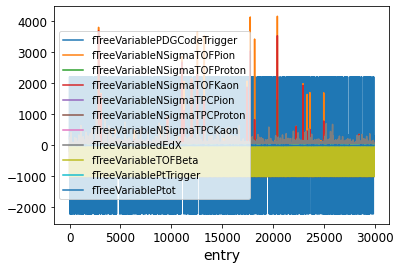

In [ ]:
PandaPionDF.plot()

In [ ]:
#PandaPionDF["fTreeVariableTOFMass"].value_counts()

In [ ]:
PandaPionDF["fTreeVariablePDGCodeTrigger"].value_counts()

 211     13025
-211     12806
 321      1064
-321      1029
 2212      633
-2212      593
 11        274
-11        248
 13        114
-13        100
Name: fTreeVariablePDGCodeTrigger, dtype: int64

In [ ]:
PandaPionDF["fTreeVariableNSigmaTOFPion"].value_counts()

-999.000000    20784
-1.395882          1
-0.572985          1
-0.043624          1
 0.947981          1
               ...  
-0.260367          1
 0.123686          1
-0.161435          1
-0.611046          1
-0.468750          1
Name: fTreeVariableNSigmaTOFPion, Length: 9103, dtype: int64

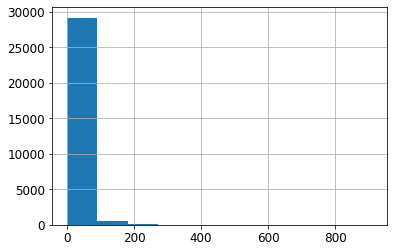

In [ ]:
PandaPionDF["fTreeVariabledEdX"].hist()

Saving figure /content/gdrive/My Drive/FinalExamML/attributes_histogram_plots


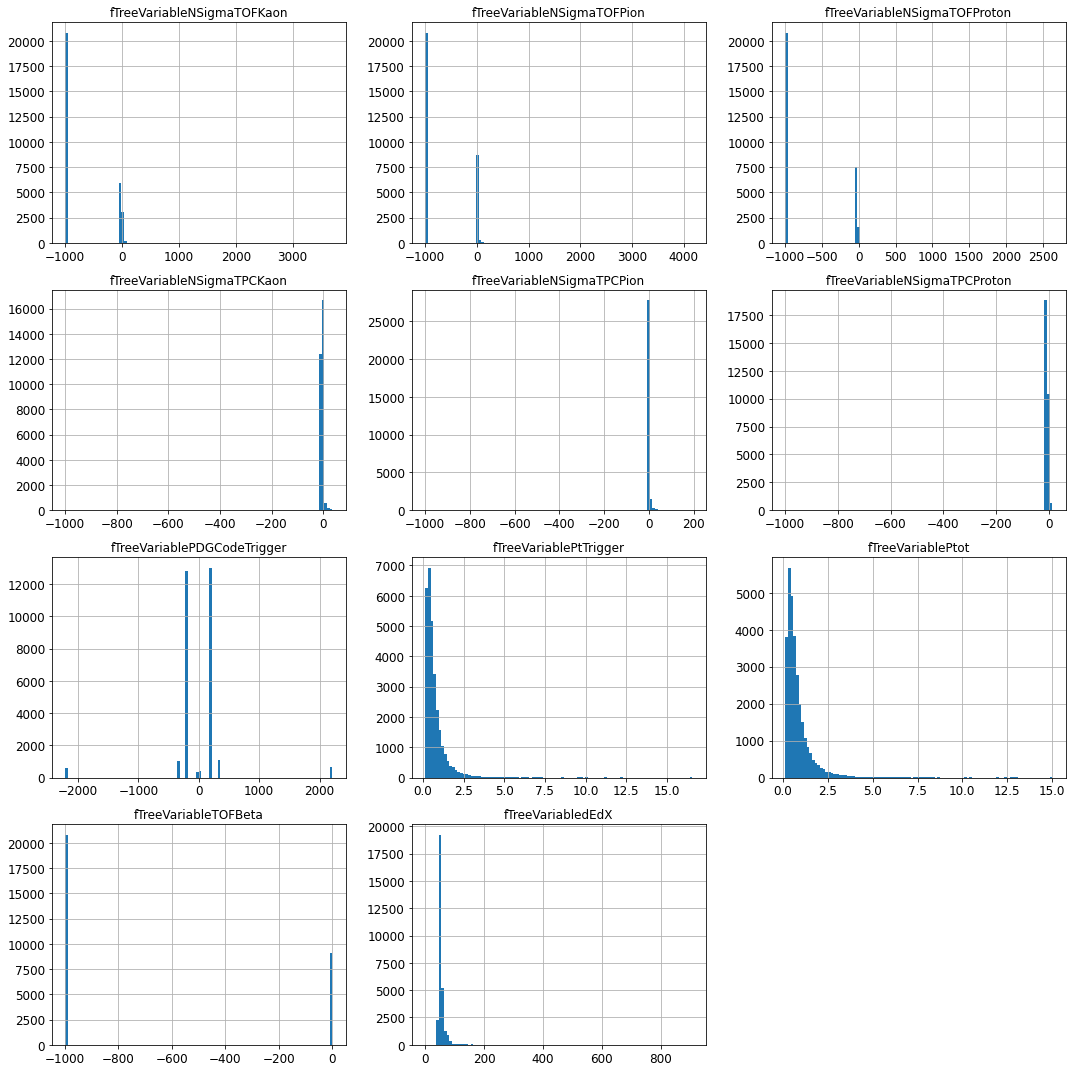

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
PandaPionDF.hist(bins=100, figsize=(15,15))
save_fig("/content/gdrive/My Drive/FinalExamML/attributes_histogram_plots")
plt.show()

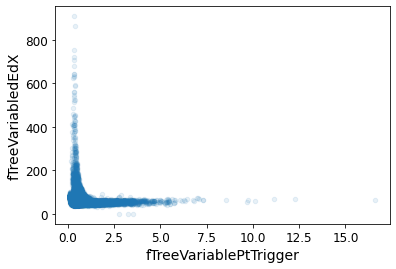

In [ ]:
PandaPionDF.plot(kind="scatter", x="fTreeVariablePtTrigger", y="fTreeVariabledEdX", alpha=0.1)

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


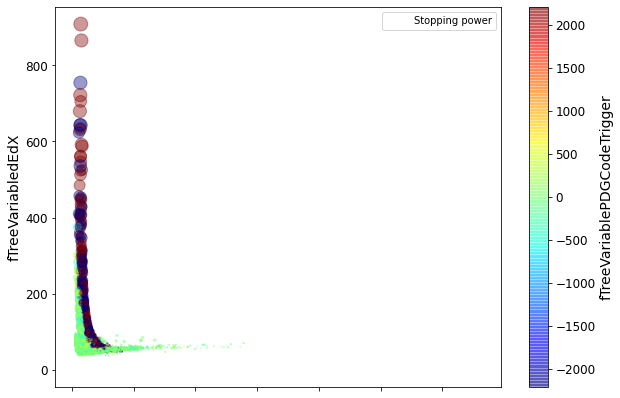

In [ ]:
PandaPionDF.plot(kind="scatter", x="fTreeVariablePtTrigger", y="fTreeVariabledEdX", alpha=0.4,
    s=PandaPionDF["fTreeVariableNSigmaTPCPion"], label="Stopping power", figsize=(10,7),
    c="fTreeVariablePDGCodeTrigger", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
#save_fig("/content/gdrive/My Drive/Hands-on/housing_prices_scatterplot")

In [ ]:
PandaPionDF_sigPlus=PandaPionDF[PandaPionDF.fTreeVariablePDGCodeTrigger==211]
PandaPionDF_sigMinus=PandaPionDF[PandaPionDF.fTreeVariablePDGCodeTrigger==-211]
PandaPionDF_sigtot=PandaPionDF[(PandaPionDF.fTreeVariablePDGCodeTrigger==211) | (PandaPionDF.fTreeVariablePDGCodeTrigger==-211) ]
PandaPionDF_bkgtot=PandaPionDF[(PandaPionDF.fTreeVariablePDGCodeTrigger!=211) & (PandaPionDF.fTreeVariablePDGCodeTrigger!=-211) ]
#PandaPionDF_sigPlus.info()
#PandaPionDF_sigMinus.info()
PandaPionDF_sigtot.info()
PandaPionDF_bkgtot.info()
PandaPionDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25831 entries, 0 to 29885
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fTreeVariablePDGCodeTrigger   25831 non-null  int32  
 1   fTreeVariableNSigmaTOFPion    25831 non-null  float64
 2   fTreeVariableNSigmaTOFProton  25831 non-null  float64
 3   fTreeVariableNSigmaTOFKaon    25831 non-null  float64
 4   fTreeVariableNSigmaTPCPion    25831 non-null  float64
 5   fTreeVariableNSigmaTPCProton  25831 non-null  float64
 6   fTreeVariableNSigmaTPCKaon    25831 non-null  float64
 7   fTreeVariabledEdX             25831 non-null  float64
 8   fTreeVariableTOFBeta          25831 non-null  float64
 9   fTreeVariablePtTrigger        25831 non-null  float64
 10  fTreeVariablePtot             25831 non-null  float64
dtypes: float64(10), int32(1)
memory usage: 2.3 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4055 entries, 1 to 2988

In [ ]:
VarRangeMin=[-3000, -10,-10,-10, -10,-10, -10, 0, -100, 0, 0, 0]
x=-1
n=5
for var in range(n):
 x+=1
 print(VarRangeMin[x])


-3000
-10
-10
-10
-10


fTreeVariableNSigmaTOFPion
-50


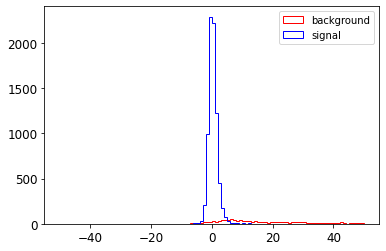

fTreeVariableNSigmaTOFProton
-50


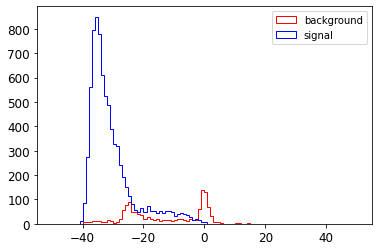

fTreeVariableNSigmaTOFKaon
-50


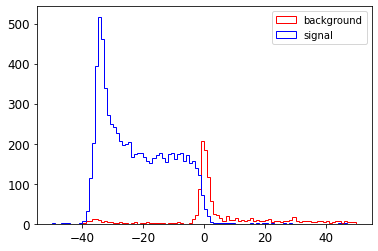

fTreeVariableNSigmaTPCPion
-50


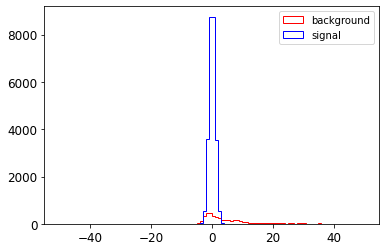

fTreeVariableNSigmaTPCProton
-50


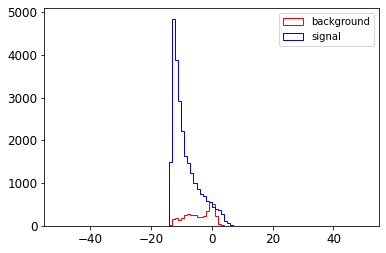

fTreeVariableNSigmaTPCKaon
-10


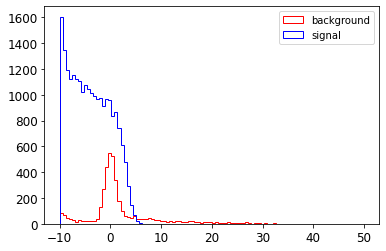

fTreeVariabledEdX
0


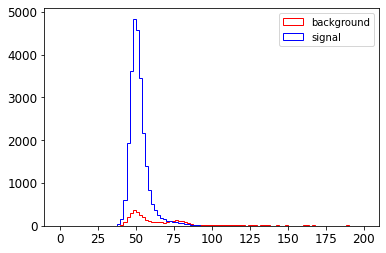

fTreeVariableTOFBeta
0


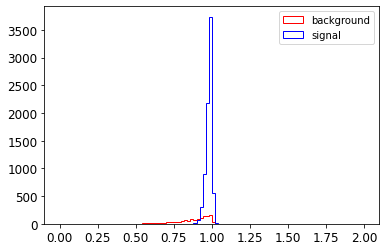

fTreeVariablePtTrigger
0


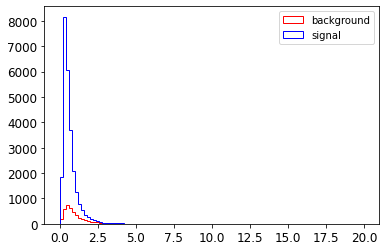

fTreeVariablePtot
0


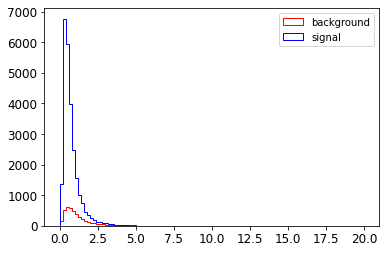

In [ ]:
import numpy as np
VarRangeMin=[-50,-50,-50, -50,-50, -10, 0, 0, 0, 0, 0]
VarRangeMax=[50,50,50, 50,50, 50, 200, 2, 20, 20, 5]
#VarRangeMin=-50
x=-1
for var in VarNames[1:]: #this VarNames[1:] is a way to skip the first variable which is the true label
    x+=1
    print(var)
    print(VarRangeMin[x])
    plt.figure()
    plt.hist(np.array(PandaPionDF_bkgtot[var]),bins=100,range=(VarRangeMin[x],VarRangeMax[x]),histtype="step", color="red",label="background")
    plt.hist(np.array(PandaPionDF_sigtot[var]),bins=100,range=(VarRangeMin[x],VarRangeMax[x]),histtype="step", color="blue", label="signal")
    #plt.hist(np.array(PandaPionDF_bkgtot[var]),bins=100,range=(-50,50),histtype="step", color="red",label="background")
    #plt.hist(np.array(PandaPionDF_sigtot[var]),bins=100,range=(-50,50),histtype="step", color="blue", label="signal")
    plt.legend(loc='upper right')
    plt.show()

#Question: how to normalise the distributions?
#Question: do you remember how to add labels to the axis?

### **Training and testing**

In [ ]:
#from sklearn.preprocessing import OrdinalEncoder

#Y_PandaPionDF = PandaPionDF[["fTreeVariablePDGCodeTrigger"]]
#ordinal_encoder = OrdinalEncoder()
#Y_PandaPionDF_encoded = ordinal_encoder.fit_transform(Y_PandaPionDF)
#Y_PandaPionDF[:10]
#Y_PandaPionDF_encoded[:10]


In [ ]:
fnames = {211: 1, -211: 1, 2212: 0, -2212:0, 11: 0, -11:0, 13: 0, -13:0 , 321: 0, -321:0}
PandaPionDFTry1['fTreeVariablePDGCodeTrigger'] = PandaPionDF['fTreeVariablePDGCodeTrigger'].map(fnames)
PandaPionDFTry1.head()
PandaPionDFTry1.describe()

,fTreeVariablePDGCodeTrigger,fTreeVariableNSigmaTOFPion,fTreeVariableNSigmaTOFProton,fTreeVariableNSigmaTOFKaon,fTreeVariableNSigmaTPCPion,fTreeVariableNSigmaTPCProton,fTreeVariableNSigmaTPCKaon,fTreeVariabledEdX,fTreeVariableTOFBeta,fTreeVariablePtTrigger,fTreeVariablePtot
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.000000,29886.000000,29886.000000,29886.000000,29886.000000,29886.000000,29886.000000
mean,0.864318,-691.978429,-702.733083,-699.022504,0.962169,-8.064070,-4.049363,55.557713,-694.454808,0.689646,0.798664
std,0.342457,468.556713,448.616604,456.007426,12.408893,10.953616,11.248198,25.783751,460.209062,0.612956,0.739125
min,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,0.134207,0.118804
25%,1.000000,-999.000000,-999.000000,-999.000000,-0.689037,-11.808264,-8.294208,48.187500,-999.000000,0.324390,0.363637
50%,1.000000,-999.000000,-999.000000,-999.000000,0.058235,-9.476601,-4.296030,51.062500,-999.000000,0.511089,0.583915
75%,1.000000,-0.841192,-36.153902,-33.377750,0.857522,-5.001413,-0.333522,55.218750,0.949243,0.832866,0.958753
max,1.000000,4169.488770,2629.593018,3698.128906,193.287811,12.716328,35.669773,908.000000,1.205457,16.570082,15.016760


In [ ]:
#@title
N_Train=25000

Train_Sample=PandaPionDFTry1[:N_Train]
Test_Sample=PandaPionDFTry1[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["fTreeVariablePDGCodeTrigger"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["fTreeVariablePDGCodeTrigger"]

# do you understand what's happening in the following two lines?
Test_sig=Test_Sample[(Test_Sample.fTreeVariablePDGCodeTrigger==211) | (Test_Sample.fTreeVariablePDGCodeTrigger==-211)]
Test_bkg=Test_Sample[(Test_Sample.fTreeVariablePDGCodeTrigger!=211) & (Test_Sample.fTreeVariablePDGCodeTrigger!=-211)]

In [ ]:

y_Train.describe()

count    25000.000000
mean         0.863680
std          0.343135
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: fTreeVariablePDGCodeTrigger, dtype: float64

In [ ]:
#I don't understand how this works
def func(x):
  #if (x==211 | x==-211):
  if (x > 0):
#  if x in [211, -211]:
   print('x>0')
   print(x)
   return lambda x: 1
  else :
   print(x)
   return lambda x: 0

y_Train_transf = y_Train.transform(func(x))
y_Test_transf = y_Test.transform(func(x))


x>0
9
x>0
9


In [ ]:
y_Train_transf.describe()

count    25000.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: fTreeVariablePDGCodeTrigger, dtype: float64

In [ ]:
X_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fTreeVariableNSigmaTOFPion    25000 non-null  float64
 1   fTreeVariableNSigmaTOFProton  25000 non-null  float64
 2   fTreeVariableNSigmaTOFKaon    25000 non-null  float64
 3   fTreeVariableNSigmaTPCPion    25000 non-null  float64
 4   fTreeVariableNSigmaTPCProton  25000 non-null  float64
 5   fTreeVariableNSigmaTPCKaon    25000 non-null  float64
 6   fTreeVariabledEdX             25000 non-null  float64
 7   fTreeVariableTOFBeta          25000 non-null  float64
 8   fTreeVariablePtTrigger        25000 non-null  float64
 9   fTreeVariablePtot             25000 non-null  float64
dtypes: float64(10)
memory usage: 1.9 MB


In [ ]:
X_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4886 entries, 25000 to 29885
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fTreeVariableNSigmaTOFPion    4886 non-null   float64
 1   fTreeVariableNSigmaTOFProton  4886 non-null   float64
 2   fTreeVariableNSigmaTOFKaon    4886 non-null   float64
 3   fTreeVariableNSigmaTPCPion    4886 non-null   float64
 4   fTreeVariableNSigmaTPCProton  4886 non-null   float64
 5   fTreeVariableNSigmaTPCKaon    4886 non-null   float64
 6   fTreeVariabledEdX             4886 non-null   float64
 7   fTreeVariableTOFBeta          4886 non-null   float64
 8   fTreeVariablePtTrigger        4886 non-null   float64
 9   fTreeVariablePtot             4886 non-null   float64
dtypes: float64(10)
memory usage: 381.8 KB


In [ ]:
y_Test.head()

entry
25000    1
25001    1
25002    1
25003    1
25004    1
Name: fTreeVariablePDGCodeTrigger, dtype: int64

In [ ]:
y_Test.describe()

count    4886.000000
mean        0.867581
std         0.338981
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: fTreeVariablePDGCodeTrigger, dtype: float64

In [ ]:
y_Test.value_counts()

1    4239
0     647
Name: fTreeVariablePDGCodeTrigger, dtype: int64

In [ ]:
print(Test_sig)

Empty DataFrame
Columns: [fTreeVariablePDGCodeTrigger, fTreeVariableNSigmaTOFPion, fTreeVariableNSigmaTOFProton, fTreeVariableNSigmaTOFKaon, fTreeVariableNSigmaTPCPion, fTreeVariableNSigmaTPCProton, fTreeVariableNSigmaTPCKaon, fTreeVariabledEdX, fTreeVariableTOFBeta, fTreeVariablePtTrigger, fTreeVariablePtot]
Index: []


In [ ]:
Test_sig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fTreeVariablePDGCodeTrigger   0 non-null      int64  
 1   fTreeVariableNSigmaTOFPion    0 non-null      float64
 2   fTreeVariableNSigmaTOFProton  0 non-null      float64
 3   fTreeVariableNSigmaTOFKaon    0 non-null      float64
 4   fTreeVariableNSigmaTPCPion    0 non-null      float64
 5   fTreeVariableNSigmaTPCProton  0 non-null      float64
 6   fTreeVariableNSigmaTPCKaon    0 non-null      float64
 7   fTreeVariabledEdX             0 non-null      float64
 8   fTreeVariableTOFBeta          0 non-null      float64
 9   fTreeVariablePtTrigger        0 non-null      float64
 10  fTreeVariablePtot             0 non-null      float64
dtypes: float64(10), int64(1)
memory usage: 0.0 bytes


In [ ]:
Test_bkg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4886 entries, 25000 to 29885
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fTreeVariablePDGCodeTrigger   4886 non-null   int64  
 1   fTreeVariableNSigmaTOFPion    4886 non-null   float64
 2   fTreeVariableNSigmaTOFProton  4886 non-null   float64
 3   fTreeVariableNSigmaTOFKaon    4886 non-null   float64
 4   fTreeVariableNSigmaTPCPion    4886 non-null   float64
 5   fTreeVariableNSigmaTPCProton  4886 non-null   float64
 6   fTreeVariableNSigmaTPCKaon    4886 non-null   float64
 7   fTreeVariabledEdX             4886 non-null   float64
 8   fTreeVariableTOFBeta          4886 non-null   float64
 9   fTreeVariablePtTrigger        4886 non-null   float64
 10  fTreeVariablePtot             4886 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 458.1 KB


In [ ]:
X_Train.describe()

,fTreeVariableNSigmaTOFPion,fTreeVariableNSigmaTOFProton,fTreeVariableNSigmaTOFKaon,fTreeVariableNSigmaTPCPion,fTreeVariableNSigmaTPCProton,fTreeVariableNSigmaTPCKaon,fTreeVariabledEdX,fTreeVariableTOFBeta,fTreeVariablePtTrigger,fTreeVariablePtot
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,-692.144013,-703.080572,-699.259678,0.961772,-8.075364,-4.058613,55.585401,-694.932322,0.690509,0.799454
std,469.702913,448.762597,456.660967,13.257815,11.803192,12.093494,26.156489,460.007250,0.616540,0.742045
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,0.134207,0.118804
25%,-999.000000,-999.000000,-999.000000,-0.691092,-11.808366,-8.320396,48.187500,-999.000000,0.323819,0.362983
50%,-999.000000,-999.000000,-999.000000,0.059749,-9.476200,-4.291474,51.062500,-999.000000,0.512245,0.584125
75%,-0.867423,-36.146825,-33.324677,0.860006,-4.976694,-0.330226,55.218750,0.948616,0.833880,0.960217
max,4169.488770,2629.593018,3698.128906,193.287811,12.716328,35.669773,908.000000,1.205457,16.570082,15.016760


In [ ]:
y_Test_transf.describe()

count    4886.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: fTreeVariablePDGCodeTrigger, dtype: float64

In [ ]:
y_Train_transf.describe()

count    25000.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: fTreeVariablePDGCodeTrigger, dtype: float64

# Fisher discriminant

In [ ]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()
Fisher.fit(X_Train,y_Train)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
#plt.figure()
#plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal")
#plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background")
#plt.legend(loc='upper right')
#plt.show()

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



In [ ]:
y_Train_pred = Fisher.predict(X_Train)
y_Test_pred = Fisher.predict(X_Test)
#print(accuracy_score(y_Train, y_Train))
print(accuracy_score(y_Train, y_Train_pred))
print(accuracy_score(y_Test, y_Test_pred))
print(cross_val_score(Fisher, X_Train, y_Train, cv=3,scoring="accuracy"))
print(y_Test_pred)

0.88932
0.8927548096602538
[0.89176866 0.88779551 0.88827553]
[1 1 1 ... 1 1 1]


In [ ]:
confusion_matrix(y_Train, y_Train_pred, labels=[1,0])

array([[21524,    68],
       [ 2699,   709]])

In [ ]:
y_scores = cross_val_predict(Fisher, X_Train, y_Train, cv=3,
                             method="decision_function")
print(y_scores)

[2.89678003 2.13014553 4.59934035 ... 1.84604619 2.79179767 1.64922868]


In [ ]:
y_Train_pred_2=y_Train
confusion_matrix(y_Train, y_Train_pred_2)

array([[ 3408,     0],
       [    0, 21592]])

In [ ]:
print(precision_score(y_Train, y_Train_pred))
print(recall_score(y_Train, y_Train_pred))


0.8885769722990546
0.9968506854390515


In [ ]:
print(precision_score(y_Test, y_Test_pred))
print(recall_score(y_Test, y_Test_pred))

0.8912997682746998
0.9981127624439726


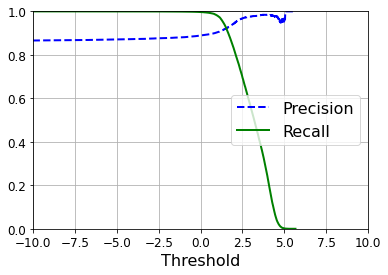

<Figure size 576x288 with 0 Axes>

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_Train, Fisher.decision_function(X_Train))

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)
    plt.axis([-10, 10, 0, 1])        
    plt.grid(True)         
    plt.figure(figsize=(8, 4))                                                                 

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

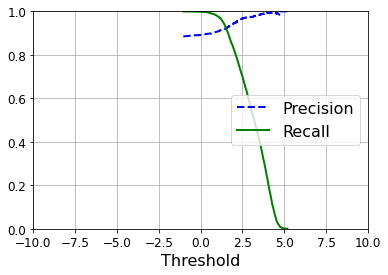

<Figure size 576x288 with 0 Axes>

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_Test, Fisher.decision_function(X_Test))                                                              

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

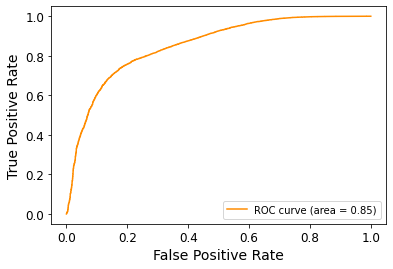

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Train, Fisher.decision_function(X_Train))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# Default method 1

In [ ]:
PandaPionDF_DM1=treePion.pandas.df(["fTreeVariablePDGCodeTrigger", "fTreeVariableNSigmaTOF*", "fTreeVariableNSigmaTPC*", "fTreeVariabledEdX", "fTreeVariableTOFBeta", "fTreeVariablePtTrigger", "fTreeVariablePtot"])
PandaPionDF_DM1.loc[(PandaPionDF_DM1['fTreeVariablePDGCodeTrigger'] !=0),  'fTreeVariablePDGCodeTrigger'] = 0
PandaPionDF_DM1.loc[(abs(PandaPionDF_DM1['fTreeVariableNSigmaTPCPion']) <= 3) & (PandaPionDF_DM1['fTreeVariableNSigmaTOFPion'] ==-999) , 'fTreeVariablePDGCodeTrigger'] = 1
PandaPionDF_DM1.loc[(abs(PandaPionDF_DM1['fTreeVariableNSigmaTPCPion']) <= 3) & (abs(PandaPionDF_DM1['fTreeVariableNSigmaTOFPion']) <=3 ) , 'fTreeVariablePDGCodeTrigger'] = 1
PandaPionDF_DM1

,fTreeVariablePDGCodeTrigger,fTreeVariableNSigmaTOFPion,fTreeVariableNSigmaTOFProton,fTreeVariableNSigmaTOFKaon,fTreeVariableNSigmaTPCPion,fTreeVariableNSigmaTPCProton,fTreeVariableNSigmaTPCKaon,fTreeVariabledEdX,fTreeVariableTOFBeta,fTreeVariablePtTrigger,fTreeVariablePtot
entry,,,,,,,,,,,
0,1,-2.230226,-35.320332,-25.963812,-0.127966,-9.431816,-3.828087,52.43750,0.994264,0.649327,0.670385
1,0,10.081083,0.804991,7.599912,-2.008423,0.096354,0.284303,47.50000,0.924140,2.227615,2.447410
2,1,-0.553305,-27.344255,-33.411983,0.689799,-11.394800,-7.378132,47.75000,0.942234,0.379171,0.388629
3,1,-999.000000,-999.000000,-999.000000,-0.032429,-12.332022,-8.524711,51.34375,-999.000000,0.369425,0.367349
4,1,-999.000000,-999.000000,-999.000000,-0.359210,-9.399902,-4.866641,45.81250,-999.000000,0.446053,0.562155
...,...,...,...,...,...,...,...,...,...,...,...
29881,1,-999.000000,-999.000000,-999.000000,0.184357,-1.257316,1.580425,53.65625,-999.000000,1.026745,1.465556
29882,1,-999.000000,-999.000000,-999.000000,1.364241,-11.928434,-8.041983,47.78125,-999.000000,0.261129,0.351443
29883,1,-999.000000,-999.000000,-999.000000,0.234863,-11.159876,-6.697582,52.50000,-999.000000,0.329840,0.446656


In [ ]:
N_Train=25000

Test_Sample_TrueY=PandaPionDFTry1[N_Train:]
Test_Sample_DM1=PandaPionDF_DM1[N_Train:]

y_True=Test_Sample_TrueY["fTreeVariablePDGCodeTrigger"]
y_DM1=Test_Sample_DM1["fTreeVariablePDGCodeTrigger"]

In [ ]:
y_True.describe()

count    4886.000000
mean        0.867581
std         0.338981
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: fTreeVariablePDGCodeTrigger, dtype: float64

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_True, y_DM1))
print(recall_score(y_True, y_DM1))

0.9492919141160348
0.9804199103562161


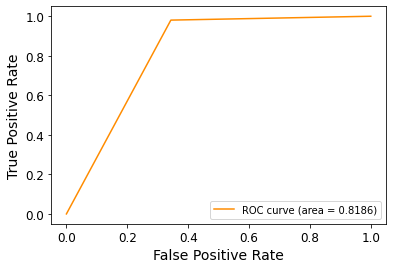

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_True, y_DM1)

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# Default method 2

In [ ]:
PandaPionDF_DM2=treePion.pandas.df(["fTreeVariablePDGCodeTrigger", "fTreeVariableNSigmaTOF*", "fTreeVariableNSigmaTPC*", "fTreeVariabledEdX", "fTreeVariableTOFBeta", "fTreeVariablePtTrigger", "fTreeVariablePtot"])
PandaPionDF_DM2.loc[(PandaPionDF_DM2['fTreeVariablePDGCodeTrigger'] !=0),  'fTreeVariablePDGCodeTrigger'] = 0
PandaPionDF_DM2.loc[(abs(PandaPionDF_DM2['fTreeVariableNSigmaTPCPion']) <= 3) & (PandaPionDF_DM2['fTreeVariableNSigmaTOFPion'] ==-999) , 'fTreeVariablePDGCodeTrigger'] = 1
PandaPionDF_DM2.loc[((abs(PandaPionDF_DM2['fTreeVariableNSigmaTPCPion'])**2 + abs(PandaPionDF_DM2['fTreeVariableNSigmaTOFPion'])**2 )<= 9) & (abs(PandaPionDF_DM2['fTreeVariableNSigmaTOFPion']) !=-999 ) , 'fTreeVariablePDGCodeTrigger'] = 1
PandaPionDF_DM2

,fTreeVariablePDGCodeTrigger,fTreeVariableNSigmaTOFPion,fTreeVariableNSigmaTOFProton,fTreeVariableNSigmaTOFKaon,fTreeVariableNSigmaTPCPion,fTreeVariableNSigmaTPCProton,fTreeVariableNSigmaTPCKaon,fTreeVariabledEdX,fTreeVariableTOFBeta,fTreeVariablePtTrigger,fTreeVariablePtot
entry,,,,,,,,,,,
0,1,-2.230226,-35.320332,-25.963812,-0.127966,-9.431816,-3.828087,52.43750,0.994264,0.649327,0.670385
1,0,10.081083,0.804991,7.599912,-2.008423,0.096354,0.284303,47.50000,0.924140,2.227615,2.447410
2,1,-0.553305,-27.344255,-33.411983,0.689799,-11.394800,-7.378132,47.75000,0.942234,0.379171,0.388629
3,1,-999.000000,-999.000000,-999.000000,-0.032429,-12.332022,-8.524711,51.34375,-999.000000,0.369425,0.367349
4,1,-999.000000,-999.000000,-999.000000,-0.359210,-9.399902,-4.866641,45.81250,-999.000000,0.446053,0.562155
...,...,...,...,...,...,...,...,...,...,...,...
29881,1,-999.000000,-999.000000,-999.000000,0.184357,-1.257316,1.580425,53.65625,-999.000000,1.026745,1.465556
29882,1,-999.000000,-999.000000,-999.000000,1.364241,-11.928434,-8.041983,47.78125,-999.000000,0.261129,0.351443
29883,1,-999.000000,-999.000000,-999.000000,0.234863,-11.159876,-6.697582,52.50000,-999.000000,0.329840,0.446656


In [ ]:
N_Train=25000

#Test_Sample_TrueY=PandaPionDFTry1[N_Train:]
Test_Sample_DM2=PandaPionDF_DM2[N_Train:]

#y_True=Test_Sample_TrueY["fTreeVariablePDGCodeTrigger"]
y_DM2=Test_Sample_DM2["fTreeVariablePDGCodeTrigger"]

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_True, y_DM2))
print(recall_score(y_True, y_DM2))

0.9499540863177227
0.9761736258551545


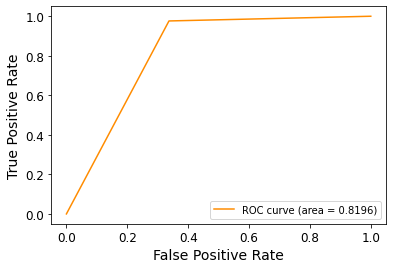

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_True, y_DM2)

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# BDT

In [ ]:
clf=tree.DecisionTreeClassifier()
clf.fit(X_Train,y_Train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')